# DJ-Imaging Merged

In [1]:
import sys, os
if os.path.basename(os.getcwd())=='notebooks': os.chdir('..')
os.getcwd()
# Set up basics
import datajoint as dj; dj.conn()
import numpy as np
# Enable plotting and make plots pretty (seaborn)
from matplotlib import pyplot as plt
import seaborn as sns
sns.set(style='dark')

Connecting root@localhost:3306


In [2]:
from workflow_behavior.pipeline import lab, subject, session#, DLCModel

In [5]:
import element_behavior

In [6]:
from element_behavior.dlc import DLCModel

DLC loaded in light mode; you cannot use any GUI (labeling, relabeling and standalone GUI)


In [8]:
dj.Diagram(subject)

DataJointError: Class DLCModel is not properly declared (schema decorator not applied?)

In [15]:
schema=dj.schema()
schema.activate('neuro_dlc')

In [16]:
neuro_dlc

NameError: name 'neuro_dlc' is not defined

In [6]:
lab.activate(db_prefix + 'lab')
subject.activate(db_prefix + 'subject')
session.activate(db_prefix + 'session')
dlc.activate(db_prefix + 'dlc')

AttributeError: 'NoneType' object has no attribute '__dict__'

In [7]:
%debug

> <frozen importlib._bootstrap>(973)_find_and_load_unlocked()



ipdb>  up


> <frozen importlib._bootstrap>(991)_find_and_load()



ipdb>  up


> <frozen importlib._bootstrap>(1014)_gcd_import()



ipdb>  up


> /Users/cb/miniconda3/envs/venv-dlc/lib/python3.8/importlib/__init__.py(127)import_module()
    125                 break
    126             level += 1
--> 127     return _bootstrap._gcd_import(name[level:], package, level)
    128 
    129 



ipdb>  up


> /Volumes/GoogleDrive/My Drive/Dev/element-animal/element_animal/subject.py(24)activate()
     22     """
     23     if isinstance(linking_module, str):
---> 24         linking_module = importlib.import_module(linking_module)
     25     assert inspect.ismodule(linking_module), "The argument 'dependency' must be a module's name or a module"
     26 



ipdb>  inspect.ismodule(numpy)


*** NameError: name 'numpy' is not defined


ipdb>  help('modules')


*** No help for "('modules')"


ipdb>  quit


In [ ]:
# Load base schema
db_prefix = dj.config['custom'].get('database.prefix', '')
lab.activate(db_prefix + 'lab')

schema = dj.schema(dj.config['dj_imaging.database'])
schema.spawn_missing_classes()

## Input new DLC model

This notebook shows the steps that have to be taken to insert a new deep lab cut model / processing method combination. At the moment it can only be run by administrators of the pipeline (with write permissions).

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# Set up basics
import sys, os
sys.path.append('..')

In [3]:
if os.path.basename(os.getcwd())=='notebooks': os.chdir('..')
os.getcwd()

'/Volumes/GoogleDrive/My Drive/Dev/dj-imaging'

In [4]:
import datajoint as dj; dj.conn()

Connecting root@localhost:3306


DataJoint connection (connected) root@localhost:3306

In [5]:
from imaging import *
# from helpers import *
import yaml

DLC loaded in light mode; you cannot use any GUI (labeling, relabeling and standalone GUI)
Deeplabcut package found


### Current entries 

In [6]:
from imaging.dlc import *

In [7]:
DLCModel()

dlc_model lab-friendly model name,dlc_task,dlc_date,dlc_iteration iteration/version of this model,dlc_snapshotindex which snapshot index used for prediction (if -1 then use the latest snapshot),dlc_shuffle which shuffle of the training dataset used for training the network (typically 1),dlc_trainingsetindex which training set fraction used to generate the model (typically 0),"dlc_scorer scorer/network name for a particular shuffle, training fraction etc.",dlc_cfg_template dictionary of the config yaml needed to run the deeplabcut.analyze_videos(),dlc_model_description


In [8]:
DLCTrackingProcessingMethod()

dlc_tracking_processing_method e.g 2points_leftrightear,method_description,dlc_tracking_processing_params,applicable_tracking_type,"function_to_invoke DLC processing method in the ""loaders.tracking_dlc"" module",param_hash


In [9]:
DLCProcessingMethod()

dlc_model lab-friendly model name,dlc_tracking_processing_method e.g 2points_leftrightear,method_desc description for this model-method combination


### First insert new DLC model

In [10]:
# os.chdir('openfield-Pranav-2018-10-30')
# os.listdir()
os.getcwd()
#os.chdir('/Volumes/GoogleDrive/My Drive/Dev/dj-imaging')

'/Volumes/GoogleDrive/My Drive/Dev/dj-imaging'

In [11]:
# ============================== SETUP for DEEPLABCUT ================================
# ---- DLC model ----
# load cfg from a config.yaml
wd = '/Volumes/GoogleDrive/My Drive/Dev/DeepLabCut/examples/openfield-Pranav-2018-10-30/config.yaml'
with open(wd, 'rb') as f:
    # print(f)
    cfg = yaml.safe_load(f)

In [12]:
new_model_name = 'my_model'

In [13]:
cfg

{'Task': 'openfield',
 'scorer': 'Pranav',
 'date': 'Oct30',
 'multianimalproject': None,
 'identity': None,
 'project_path': '/Volumes/GoogleDrive/My Drive/Modules/DeepLabCut/examples/openfield-Pranav-2018-10-30',
 'video_sets': {'/Volumes/GoogleDrive/My Drive/Modules/DeepLabCut/examples/openfield-Pranav-2018-10-30/videos/m4s1.mp4': {'crop': '0, 640, 0, 480'}},
 'bodyparts': ['snout', 'leftear', 'rightear', 'tailbase'],
 'start': 0,
 'stop': 1,
 'numframes2pick': 20,
 'skeleton': [],
 'skeleton_color': 'black',
 'pcutoff': 0.4,
 'dotsize': 8,
 'alphavalue': 0.7,
 'colormap': 'jet',
 'TrainingFraction': [0.95],
 'iteration': 0,
 'default_net_type': 'resnet_50',
 'default_augmenter': 'imgaug',
 'snapshotindex': -1,
 'batch_size': 4,
 'cropping': False,
 'x1': 0,
 'x2': 640,
 'y1': 277,
 'y2': 624,
 'corner2move2': [50, 50],
 'move2corner': True}

In [14]:
import deeplabcut

In [15]:
DLCModel.insert_new_model(
    **{'dlc_model': f'{new_model_name}',
       'cfg': cfg, 
       'project_path': '/Volumes/GoogleDrive/My Drive/Dev/DeepLabCut/examples/openfield-Pranav-2018-10-30',
       'dlc_model_description': 'my_model, Task: mouse_openfield, date: Dec15, iteration: 10, shuffle: 1, training_fraction: 0.95, latest snapshot',
       'dlc_scorer': 'unknown'}) 

--- DLC Model specification to be inserted ---
	dlc_model: my_model
	dlc_model_description: my_model, Task: mouse_openfield, date: Dec15, iteration: 10, shuffle: 1, training_fraction: 0.95, latest snapshot
	dlc_scorer: unknown
	dlc_task: openfield
	dlc_date: Oct30
	dlc_iteration: 0
	dlc_snapshotindex: -1
	dlc_shuffle: 1
	dlc_trainingsetindex: 0
	dlc_project_path: /Volumes/GoogleDrive/My Drive/Dev/DeepLabCut/examples/openfield-Pranav-2018-10-30
	repository_name: a
	-- Template for config.yaml --
		Task: openfield
		date: Oct30
		TrainingFraction: [0.95]
		iteration: 0
		snapshotindex: -1
		batch_size: 4
		cropping: False
		x1: 0
		x2: 640
		y1: 277
		y2: 624
Proceed with new DLC model insert? [yes, no]:  yes


IntegrityError: Cannot add or update a child row: a foreign key constraint fails (`group_shared_imaging`.`d_l_c_model__model_path`, CONSTRAINT `d_l_c_model__model_path_ibfk_2` FOREIGN KEY (`repository_name`) REFERENCES `#repository` (`repository_name`) ON UPDATE CASCADE)

### ... then take care of processing method

In [12]:
processing_method_name = "left_right_ears"

In [13]:
# ---- DLC tracking processing method ----
dlc_method = {'dlc_tracking_processing_method': processing_method_name,
              'method_description': 'using 2LED processing method on nose and base of head (no space in attribute names)',
              'dlc_tracking_processing_params': {'left_point_name': 'nose',
                                                 'right_point_name': 'mouse'},
              'applicable_tracking_type': 'OpenField',
              'function_to_invoke': 'process_two_tracked_points'}
DLCTrackingProcessingMethod.insert_new_method(**dlc_method)

DataJointError: The specified param-set already exists - name: nose_mouse_wj

In [14]:
# ---- Association of DLCModel and DLC processing method ----
DLCProcessingMethod.insert1({'dlc_model':f'{new_model_name}',
                                 'dlc_tracking_processing_method': processing_method_name})

### Make sure tracked body parts are up to date

In [15]:
from imaging.tracking import TrackedBodyPart
import pandas as pd

In [16]:
pd.DataFrame(TrackedBodyPart.fetch(as_dict=True))

,body_part
0,bodycenter
1,bottom_left_corner
2,bottom_right_corner
3,chocolate_milk
4,cue_card_bottom_center
5,left_ear
6,leftear
7,lefthand
8,leftleg
9,miniscope


In [1]:
import os
import datajoint as dj

os.chdir('..')
dj.config.load("dj_local_conf.json")

import pathlib
import numpy as np
import datetime
import ipywidgets as widgets

JSONDecodeError: Expecting property name enclosed in double quotes: line 33 column 5 (char 983)

In [2]:
dj_schema = dj.create_virtual_module('dj_schema', dj.config['dj_imaging.database'])

KeyError: 'dj_imaging.database'

In [3]:
no_dlc_sess = (dj_schema.Recording - dj_schema.RecordingDLC
               & (dj_schema.Recording.Data * dj_schema.Dataset & 'datasettype = "DLC_tracking"'))

In [4]:
no_dlc_sess

session_name Meta session name (hash),recording_order Order of session within meta sessions (zero index!),"recording_name Recording name: Hash of animal_id, datasource_id, timestamp and combined 'yes'/'no' label",animal_id,datasource_id,animal_name Animal name in mlims,timestamp Timestamp of session,combined,timeseries_name Timeseries name [e.g. MUnit_0],equipment_type,username NTNU username
6c86cf0b2c3428a3,0,1eb2f70e95b30a92,0,0,27032,2020-08-19 15:23:06,no,file,2Pminiscope_A,user123


### Recording selector UI

In [5]:
sess_selector = widgets.Dropdown(options=no_dlc_sess.proj(
    subject='animal_name', basename='timeseries_name').fetch(as_dict=True), disabled=False, description='Recordings:')

In [6]:
sess_selector

Dropdown(description='Recordings:', options=({'session_name': '6c86cf0b2c3428a3', 'recording_order': 0, 'sessi…

### DLC model/method selector

In [7]:
selected_sess = sess_selector.value

In [8]:
q_dlc_models = dj_schema.DLCModel & (dj_schema.Recording.Data * dj_schema.InferredRecordingDLC & selected_sess)

In [9]:
options = dj_schema.DLCProcessingMethod & q_dlc_models if q_dlc_models else dj_schema.DLCProcessingMethod()

In [10]:
options

dlc_model lab-friendly model name (perhaps the same as dlc_scorer),dlc_tracking_processing_method e.g 2points_leftrightear,method_desc description for this model-method combination
Resnet50_mouse_openfieldJun30shuffle1_latestSnapshot,left_right_ears,


In [11]:
dlc_selector = widgets.Dropdown(options=options.fetch('KEY'), disabled=False, description='DLC Models:')

In [12]:
dlc_selector

Dropdown(description='DLC Models:', options=({'dlc_model': 'Resnet50_mouse_openfieldJun30shuffle1_latestSnapsh…

### Insertion

In [13]:
selected_dlc = dlc_selector.value

In [14]:
dj_schema.RecordingDLC.insert1({**selected_sess, **selected_dlc}, ignore_extra_fields=True)

## Fill in Recording Type and Apparatus info

In [26]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [27]:
import sys, os
sys.path.append('..')
import numpy
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='dark')

In [28]:
from imaging import *
from helpers import *

In [29]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [30]:
from IPython.display import HTML, display
import tabulate

In [31]:
def draw_tracking(session, sessiontype, apparatus):
    try:
        track = (TrackingRaw.OpenField & 'recording_name = "{}"'.format(session)).fetch1('x_pos','y_pos')
        timeseries_name = (Recording & 'recording_name = "{}"'.format(session)).fetch1('timeseries_name')
        sns.set(style='white',font_scale=1.2)
        
        figure = plt.figure(figsize=(7,7))
        ax = figure.add_subplot(111)
        ax.scatter(track[0],track[1], s=2, c='k', alpha=.1)
        ax.set_title(timeseries_name,y=.97)
        sns.despine(left=True,bottom=True)
        ax.invert_yaxis()
        ax.set_aspect('equal')
        ax.get_xaxis().set_ticks([]);ax.get_yaxis().set_ticks([])
    
    except dj.DataJointError:
        track = (TrackingRaw.Linear & 'recording_name = "{}"'.format(session)).fetch1('pos')
        timeseries_name = (Recording & 'recording_name = "{}"'.format(session)).fetch1('timeseries_name')
        sns.set(style='white',font_scale=1.2)
        
        figure = plt.figure(figsize=(7,3))
        ax = figure.add_subplot(111)
        ax.plot(track, lw=2, c='k', alpha=.1)
        ax.set_title(timeseries_name,y=.97)
        sns.despine(left=True,bottom=True)
        ax.get_xaxis().set_ticks([]);ax.get_yaxis().set_ticks([])   

### Execute to display widget and enter sessiontype and apparatus info

In [32]:
sessions = (TrackingRaw - Recording.Apparatus).fetch('recording_name')
sessiontypes = RecordingType().fetch('sessiontype')
apparatus = Apparatus().fetch('apparatus')

if len(sessions) == 0:
    raise IndexError('No session info missing!')
    
im = interact(draw_tracking, session=sessions, sessiontype=sessiontypes, apparatus=apparatus)
button = widgets.Button(description='Insert into DB')
out = widgets.Output()

def insert_dj(b):
    recording_name = im.widget.children[0].value
    session_type = im.widget.children[1].value
    apparatus    = im.widget.children[2].value
    with out:
        category = (Apparatus & 'apparatus ="{}"'.format(apparatus)).fetch1('category')
        print('Inserting Recording: {} | Type: {} | Apparatus: {}'.format(recording_name,session_type,apparatus))
        session_entry = (Recording.proj() & 'recording_name = "{}"'.format(recording_name)).fetch1()
        session_entry['sessiontype'] = session_type
        Recording.RecordingType.insert1(session_entry, skip_duplicates=True)
        session_entry['apparatus'] = apparatus
        session_entry['category'] = category
        Recording.Apparatus.insert1(session_entry, skip_duplicates=True, ignore_extra_fields=True)

button.on_click(insert_dj)

im.widget.children[0].description = 'Recording'
im.widget.children[1].description = 'Type'
im.widget.children[2].description = 'Apparatus'
im.widget.children[3].description = 'Draw!'
widgets.HBox([button, out])

interactive(children=(Dropdown(description='session', options=('62a1f0a4383d854a',), value='62a1f0a4383d854a')…

## Work with offset corrected tracking data

In [1]:
# Set up basics
import datajoint as dj

In [2]:
import numpy as np

In [3]:
# Enable plotting and make plots pretty (seaborn)
from matplotlib import pyplot as plt
import seaborn as sns
sns.set(style='dark')
%config InlineBackend.figure_format = 'retina'

In [4]:
# Load base schema
schema = dj.schema(dj.config['dj_imaging.database'])
schema.spawn_missing_classes()

Connecting horsto@kavlidatajoint02.it.ntnu.no:3306


In [5]:
import sys
sys.path.append('..')

### Get Tracking *raw* results

In [6]:
Recording & 'username = "jorgensu"' & 'animal_name = "94921"'

session_name Meta session name (hash),recording_order Order of session within meta sessions (zero index!),"recording_name Recording name: Hash of animal_id, datasource_id, timestamp and combined 'yes'/'no' label",animal_id,datasource_id,animal_name Animal name in mlims,timestamp Timestamp of session,combined,timeseries_name Timeseries name [e.g. MUnit_0],equipment_type,username NTNU username
f8557ddd091a94b2,0,66f39b5352265e47,574e9c63eece4fbe,0,94921,2020-12-18 13:30:49,yes,trial1,2Pminiscope_A,jorgensu
f8557ddd091a94b2,1,640777a7bd5111ab,574e9c63eece4fbe,0,94921,2020-12-19 16:17:17,yes,trial2,2Pminiscope_A,jorgensu
f8557ddd091a94b2,2,4d38c8f597146dde,574e9c63eece4fbe,0,94921,2020-12-20 16:00:12,yes,trial3,2Pminiscope_A,jorgensu


In [7]:
# pick one session 
key = (TrackingRaw & 'recording_name = "66f39b5352265e47"').fetch1('KEY')

In [10]:
# Positions (offset corrected to begin with)
x_pos_raw, y_pos_raw = (TrackingRaw.OpenField & key).fetch1('x_pos','y_pos')

# Raw signal from DLC part table 
reward_x_raw, reward_y_raw, likelihood_reward = (TrackingRaw.DLCPart & key & 'body_part = "chocolate_milk"').fetch1('bodypart_x_pos','bodypart_y_pos','bodypart_likelihood')
filter_reward = likelihood_reward > .1

Text(0.5, 1.0, 'Raw tracking results')

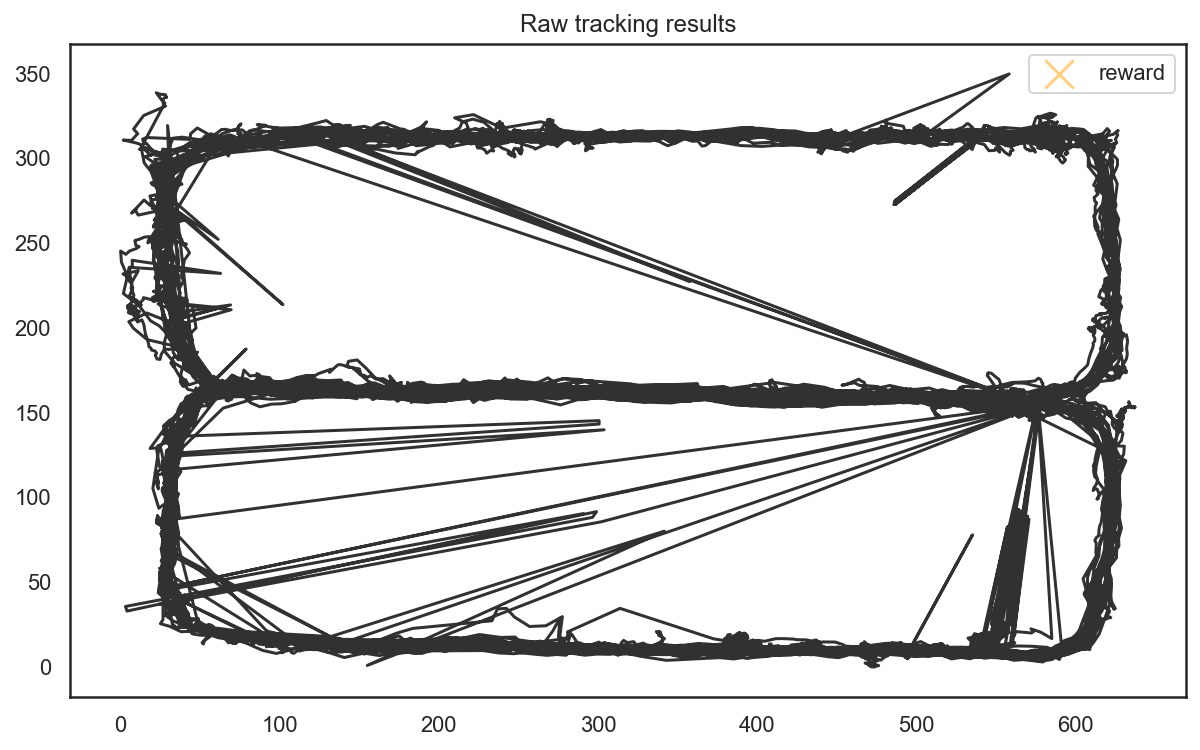

In [12]:
figure = plt.figure(figsize=(10,6))
ax = figure.add_subplot(111)

ax.plot(x_pos_raw, 
        y_pos_raw,
        '-k', 
        alpha=.9)

# Plot reward port tracking ('chocolate_milk' on top)
# ... if not present it will be filtered out 
ax.scatter(reward_x_raw[filter_reward], 
           reward_y_raw[filter_reward], 
           color='orange', 
           s=200, 
           marker='x', 
           alpha=.5, 
           zorder=10, 
           label='reward')
ax.legend()
ax.set_title('Raw tracking results')

### Do the same for Tracking results

In [13]:
# Positions (offset corrected to begin with)
x_pos, y_pos = (Tracking.OpenField & key).fetch1('x_pos','y_pos')

In [16]:
# Positions (offset corrected to begin with)
x_pos_raw, y_pos_raw = (Tracking.OpenField & key).fetch1('x_pos','y_pos')
# Raw signal 
reward_x, reward_y = (Tracking.DLCPart & key & 'body_part = "chocolate_milk"').fetch1('bodypart_x_pos','bodypart_y_pos')

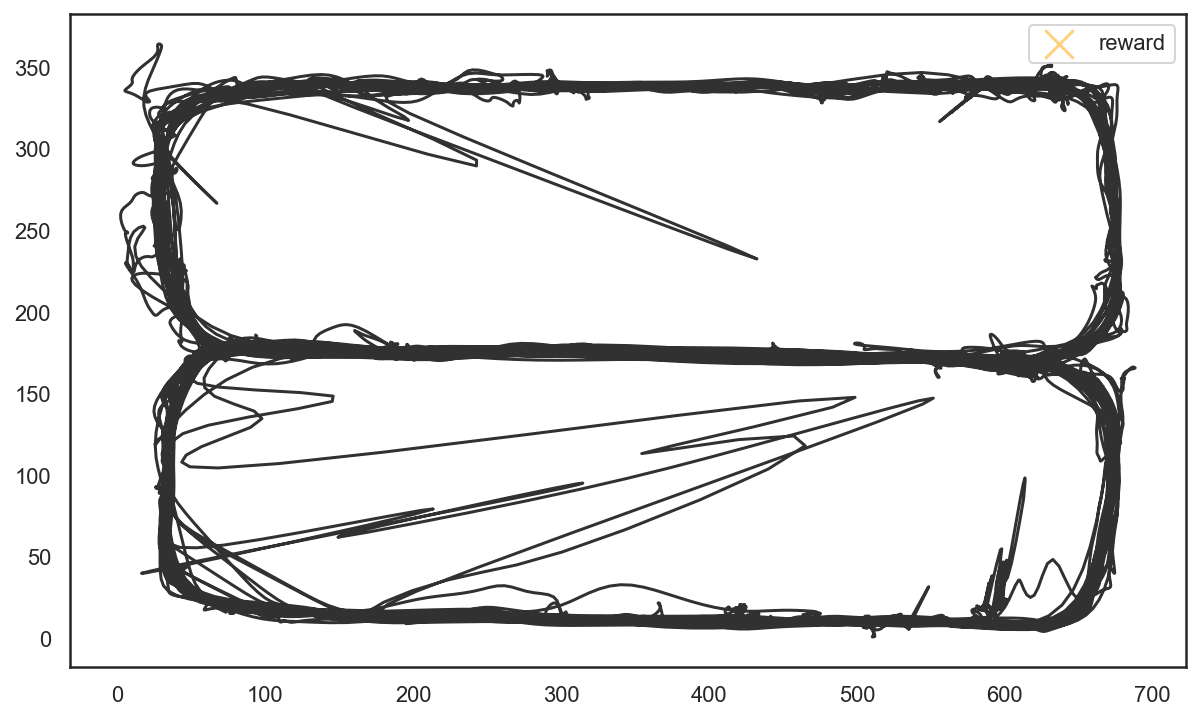

In [17]:
figure = plt.figure(figsize=(10,6))
ax = figure.add_subplot(111)

ax.plot(x_pos, y_pos, '-k', alpha=.9)
ax.scatter(reward_x[filter_reward], 
           reward_y[filter_reward], 
           color='orange', 
           s=200, 
           marker='x', 
           alpha=.5, 
           zorder=10, 
           label='reward')
ax.legend()

## Add timestamp to DLC pickle file

Information about the timestamp of the tracking video (tracking start time) is not available from the set of DLC output currently. Users will need to manually add this info into the generated pickle file, under a variable 'Start TimeStamp'
Which can be done with the following example code (copyed from here: https://github.com/kavli-ntnu/dj-moser-imaging/pull/69).

In [1]:
import scanreader # If you don't have it installed: pip install git+https://github.com/atlab/scanreader.git
from datetime import datetime
import pickle

In [2]:
import sys 
sys.path.append('..')
from imaging.utils import read_timestamp_rawtif

Connecting horsto@kavlidatajoint02.it.ntnu.no:3306
Suite2p not found


In [3]:
def add_timestamp_to_pickle(first_tif_file, matching_dlc_pkl_file):
    timestamp_tif = read_timestamp_rawtif(first_tif_file)
    video_datetime = datetime.strftime(timestamp_tif, "%Y-%m-%d_%H:%M:%S.%f")
    
    # Write to dlc pickle file
    with open(matching_dlc_pkl_file, 'rb') as f:
        pickle_dict = pickle.load(f)

    pickle_dict['Start TimeStamp'] = video_datetime
    pickle.dump(pickle_dict, open(matching_dlc_pkl_file, 'wb'))

### Configure filenames 

In [19]:
tif_file = '/Volumes/moser/horsto/MEC data from Weijian/97046/20210313/96766_20210312_ML0000_AP-400_2Openfiled_00001.tif'
matching_dlc_pkl_file = '/Volumes/moser/horsto/MEC data from Weijian/97046/20210313/96766_20210312_ML0000_AP-400_2Openfiled_dlc/96766_20210312_ML0000_AP-400_2Openfiled_00001_trackingVideoDLC_resnet_50_OPENMINI2P_topcamera_20210305Mar5shuffle1_1030000_meta.pickle'

### Execute ... 

In [20]:
add_timestamp_to_pickle(tif_file, matching_dlc_pkl_file)

## Insert object locations for object sessions in the open field

Extract sessions for which object locations have not been recorded yet. 

Create Napari (napari.org) viewer and let the user click on the center point of (round) objects and define a radius (second click). 
Then extract centers and radius for each object and insert into database.

In [1]:
import datajoint as dj 
# Load base schema
schema = dj.schema(dj.config['dj_imaging.database'])
schema.spawn_missing_classes()

Connecting horsto@kavlidatajoint02.it.ntnu.no:3306


In [2]:
from matplotlib import pyplot as plt
import seaborn as sns # Make plots pretty
sns.set(style='dark')

In [3]:
# Create GUI (QT) context
%gui qt

In [4]:
import sys
sys.path.append('..')
from helpers_visual.enter_object_locations import extract_undefined_object_sessions, create_napari_object_viewer

### User defined object location and radius

In [29]:
session = extract_undefined_object_sessions()
object_layer, key, obj_sess = create_napari_object_viewer(session)

Number of remaining sessions to define: 0


TypeError: 'NoneType' object is not iterable

### Confirm object position

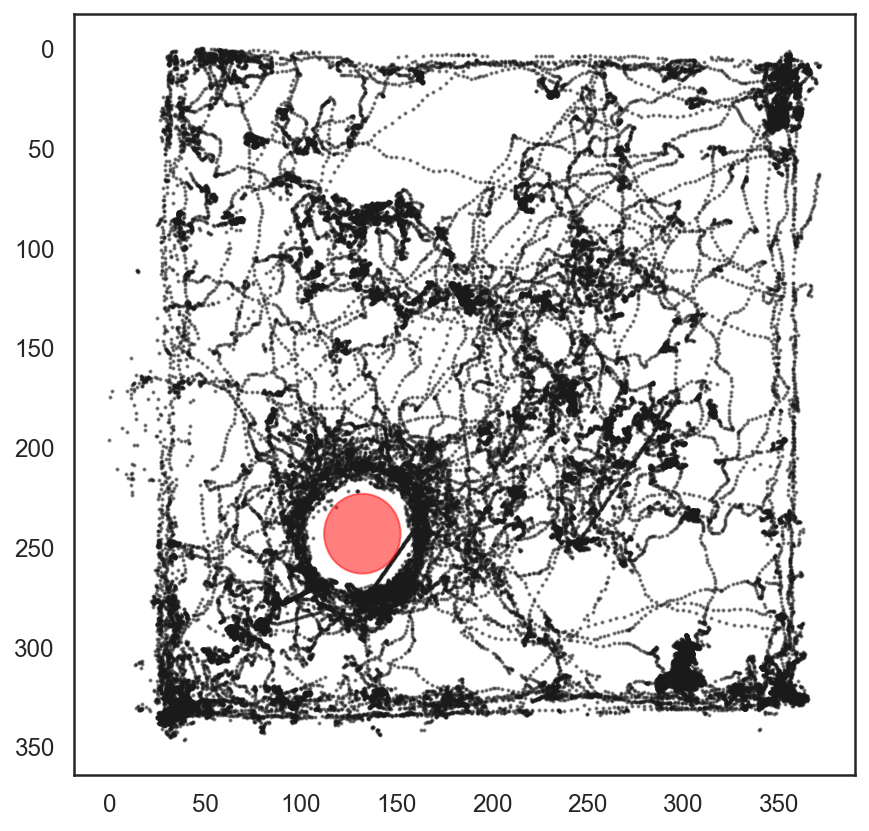

In [22]:
# Draw circles 
figure = plt.figure(figsize=(7,7))
ax = figure.add_subplot(111)
ax.scatter(obj_sess['x_pos'], obj_sess['y_pos'],s=1, color='k', alpha=.5)
for no_, point in enumerate(object_layer.data):
    if no_ == 0: 
        color='red'
    else: # if second object
        color='orange'
    object_ = plt.Circle((point[1]/2,point[0]/2), 20, color=color, alpha=.5)
    ax.add_artist(object_)
ax.invert_yaxis()
plt.show()

### Insert into database ... 

In [23]:
# First close the NAPARI window
#viewer.close()

### Loop over objects and insert

In [25]:
from imaging.spatial_scores import ArenaObjectPos
for no_, point in enumerate(object_layer.data): 
    # Create dictionary and insert into session part table
    object_dict = {
        'obj_name'           : 'duplo_tower23',
        'obj_x_coord'        : point[1]/2,
        'obj_y_coord'        : point[0]/2
         }
    Recording.ArenaObject.insert1({**key,**object_dict},skip_duplicates=True,ignore_extra_fields=True)

### Populate calibrated object positions and retrieve the session just entered 

In [26]:
ArenaObjectPos.populate(display_progress=True)

100%|██████████| 1/1 [00:00<00:00,  4.56it/s]


In [27]:
objects_example = ArenaObjectPos * ArenaObject & obj_sess
tracking_objects_example = (Tracking * Tracking.OpenField & objects_example).fetch1()

objects_example

object_hash Object hash,obj_name,session_name Meta session name (hash),recording_order Order of session within meta sessions (zero index!),"recording_name Recording name: Hash of animal_id, datasource_id, timestamp and combined 'yes'/'no' label",apparatus,"category Arena / Apparatus category (openfield, linear track, etc.)",obj_x_coord x coordinate of object in pixels,obj_y_coord y coordinate of object in pixels,dataset_name 16 character hash,"trackingparams_id Parameter set ID, starting with A",obj_x_coord_calib Object x coord [mm],obj_y_coord_calib Object y coord [mm],"obj_geometry e.g. cube, cylinder",obj_width Object width in cm,obj_length Object length in cm,obj_height Object height in cm,obj_desc Object description
8c6e12b10ae58326,duplo_tower23,694a792ec2bedcae,2,a5daab937fa60caf,Square80,Open Field,132.21,243.29,9c80e21167ee50e4,A,315.039,579.728,cube,64.0,64.0,230.0,"Colorful duplo tower, 23 cm high"


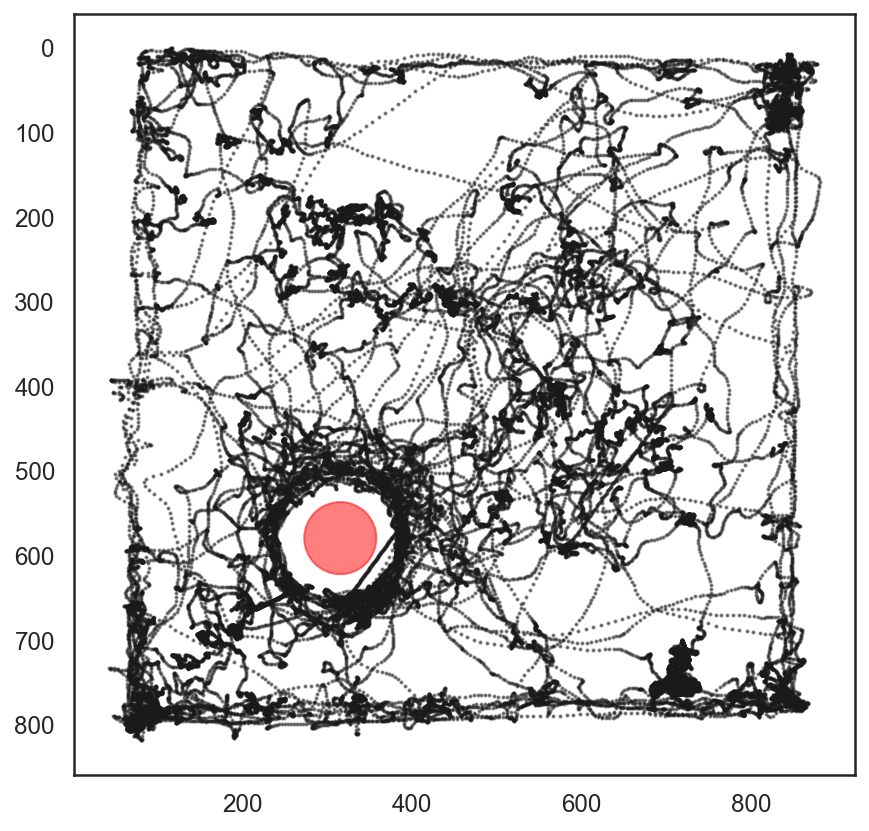

In [28]:
# Draw circles 
figure = plt.figure(figsize=(7,7))
ax = figure.add_subplot(111)
ax.scatter(tracking_objects_example['x_pos'], tracking_objects_example['y_pos'],s=1, color='k', alpha=.5)
for no_, point in enumerate(objects_example):
    if no_ == 0: 
        color='red'
    else: # if second object
        color='orange'
    object_ = plt.Circle((point['obj_x_coord_calib'],point['obj_y_coord_calib']), radius = point['obj_width']/1.5, color=color, alpha=.5)
    ax.add_artist(object_)     
ax.invert_yaxis()
plt.show()